### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Reading data

In [3]:
# Load CSV file into a Pandas DataFrame
train_df = pd.read_csv('train.csv') 
test_df = pd.read_csv('test.csv')


# Select all features except the first one called ['Unnamed:0']
train = train_df.iloc[:, 1:]
test = test_df.iloc[:, 1:]


In [40]:
train

,ph,Hardness,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Drinkable
0,8.699665,206.379671,7.725750,360.083725,408.388221,14.859047,76.846364,5.710412,0
1,6.563410,175.697020,6.084136,333.778060,412.632708,11.222295,73.502793,4.459252,1
2,6.817023,246.660238,9.051732,317.237871,464.209418,14.822665,68.918597,4.602564,0
3,7.449572,146.902210,7.950549,444.198272,554.679850,19.483985,72.081011,3.809883,0
4,5.300541,212.435573,7.313756,350.452182,356.512171,19.213205,99.351837,3.841719,1
...,...,...,...,...,...,...,...,...,...
2035,5.799883,236.684321,7.000892,321.832742,299.216835,10.689189,84.224603,2.947935,1
2036,7.838657,159.016086,6.692211,307.230030,263.542076,11.868835,58.211472,3.320310,1
2037,8.534096,213.223824,6.626447,380.389492,430.229335,19.191141,82.876058,4.456382,0
2038,6.558423,209.053922,8.198414,311.769807,502.683243,17.984424,89.038904,4.992916,0


In [41]:
test

,ph,Hardness,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.291652,186.073761,6.045361,367.989091,295.308581,11.170456,49.785878,5.328826
1,4.884432,106.394326,5.549662,369.764389,299.468182,12.333352,77.101277,4.285049
2,5.488289,186.185584,6.609243,353.107564,344.806801,19.386249,65.179697,2.372528
3,9.384693,155.312737,3.878989,389.735129,504.336229,17.829793,64.215950,2.972796
4,11.438159,186.621075,8.042822,328.019302,402.359564,18.345715,44.955298,3.816719
...,...,...,...,...,...,...,...,...
355,5.861593,180.948163,8.411882,382.707593,474.684804,17.295647,99.797941,4.250519
356,10.141595,252.366261,7.403265,392.890758,596.173489,16.366566,58.627764,4.871356
357,6.372832,210.962076,9.856898,341.740332,472.963419,13.044548,77.609727,5.160550
358,7.003981,209.367805,8.955022,260.496464,523.587946,14.085119,63.940150,3.023395


### Data exploration and visualisation

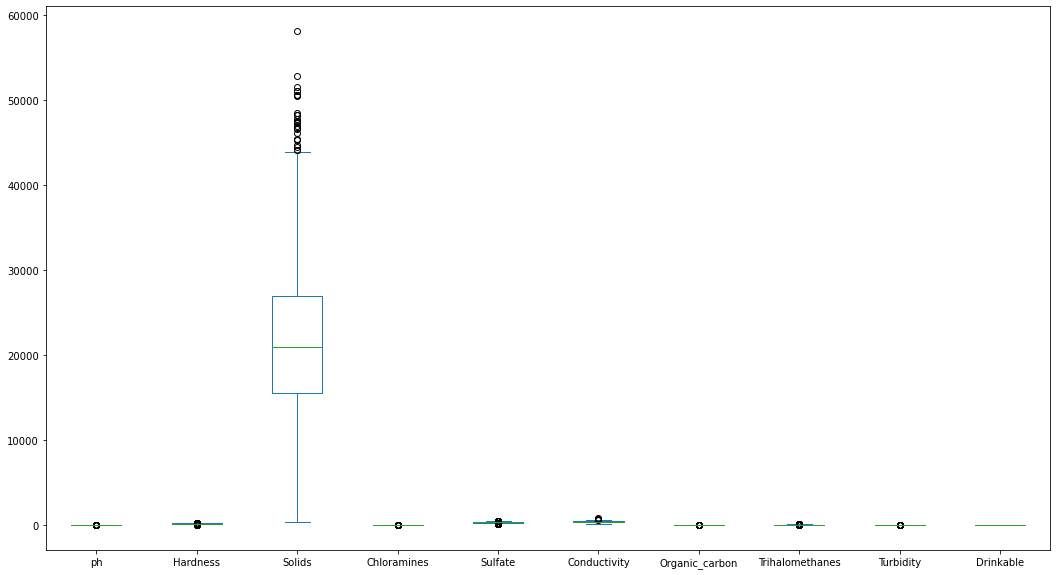

In [4]:
#Created a boxplot for each numerical column to check for outliers
fig, ax = plt.subplots(figsize=(18,10))
train.plot(kind='box', ax=ax)
plt.show()


### Data cleaning

In [5]:
# Fill missing values with the median for the respective feature
train.fillna(train.median(), inplace=True)
test.fillna(test.median(), inplace=True)


# Define the Tukey method to remove outliers
def remove_outliers_tukey(train):
    Q1 = train.quantile(0.25)
    Q3 = train.quantile(0.75)
    IQR = Q3 - Q1
    return train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]

# Apply the Tukey method to remove outliers from the whole dataframe
train_clean = remove_outliers_tukey(train)
train_clean.shape
#After cleaning, went from 2040 to 1799 rows

(1799, 10)

## Data exploration after cleaning

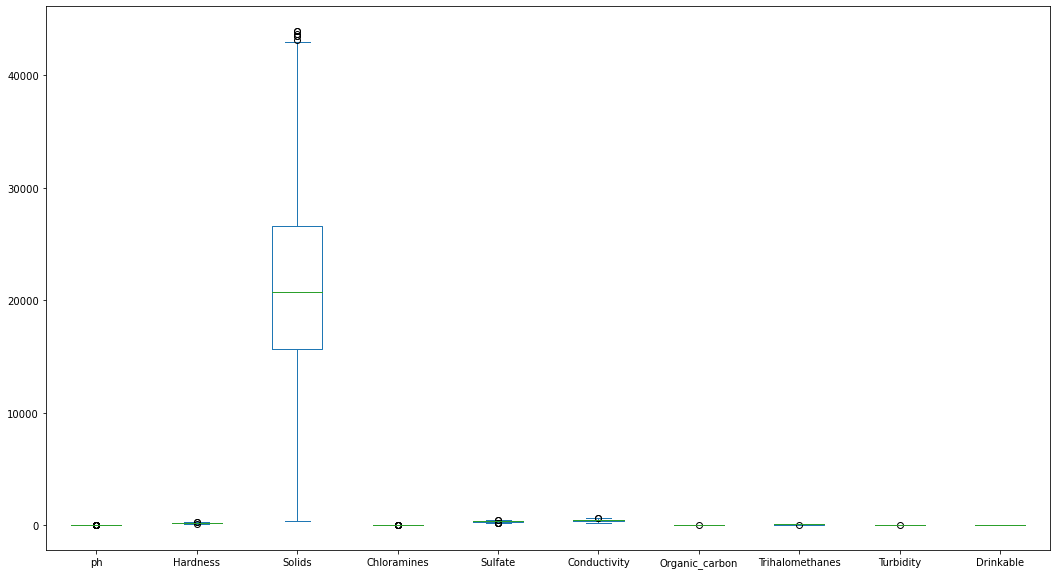

In [6]:
# Created a boxplot for each numerical column after cleaning the data from possible outliers
fig, ax = plt.subplots(figsize=(18,10))
train_clean.plot(kind='box', ax=ax)
plt.show()


### Data preprocessing

In [24]:
# Split the train.csv into X and y
X = train_clean.drop('Drinkable', axis=1)
y = train_clean['Drinkable']


# Set the parameters for Random Forest
n_estimators_list = [100, 200, 500]
max_depth_list = [20, 30, 40]
min_samples_leaf_list = [2, 4, 10]
min_samples_split_list = [2, 5, 10]
max_features_list = ['sqrt', 'log2']


best_params = {'n_estimators': None,
               'max_depth': None,
               'min_samples_leaf': None,
               'min_samples_split': None,
               'max_features': None}


In [25]:
X.shape

(1799, 9)

In [26]:
y.shape

(1799,)

#### Train test split

In [39]:
#Train test split is done in the modelling part

#### Scaling

In [254]:
# No need to scale when using random forrest 
# Random Forest is a tree-based model and hence does not require feature scaling

### Modelling

Best parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 2, 'max_features': 'sqrt'}


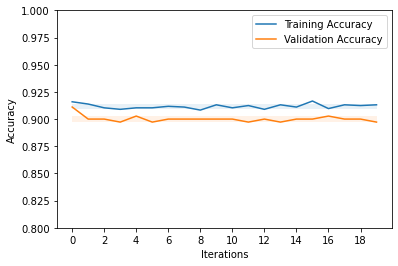

In [27]:
train_accuracies = []
val_accuracies = []

# Create a loop for multiple train-test splits
for _ in range(20):
    
    # Reset the best accuracy for each iteration
    best_accuracy = 0
    
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
                                                      random_state=42, stratify=y)

    # Train the Random Forest model with different parameters
    for n_estimators in n_estimators_list:
        for max_depth in max_depth_list:
            for min_samples_leaf in min_samples_leaf_list:
                for min_samples_split in min_samples_split_list:
                    for max_features in max_features_list:
                        model = RandomForestClassifier(n_estimators=n_estimators,
                                                       max_depth=max_depth,
                                                       min_samples_leaf=min_samples_leaf,
                                                       min_samples_split=min_samples_split,
                                                       max_features=max_features,
                                                       n_jobs=-1)
                                                      
                        model.fit(X_train, y_train)
                        predictions = model.predict(X_val)

                        # Evaluate the model's performance
                        accuracy = accuracy_score(y_val, predictions)

                        if accuracy > best_accuracy:
                            best_accuracy = accuracy
                            best_params['n_estimators'] = n_estimators
                            best_params['max_depth'] = max_depth
                            best_params['min_samples_leaf'] = min_samples_leaf
                            best_params['min_samples_split'] = min_samples_split
                            best_params['max_features'] = max_features



    # Calculate training accuracy
    train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(best_accuracy)


# Print the best parameters
print('Best parameters:', best_params)


# Plot the training and validation accuracy
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')


plt.xticks(range(0, 21, 2))
plt.xlabel('Iterations')


plt.fill_between(np.arange(len(train_accuracies)),
                 np.mean(train_accuracies) - np.std(train_accuracies),
                 np.mean(train_accuracies) + np.std(train_accuracies),
                 alpha=0.1)

plt.fill_between(np.arange(len(val_accuracies)),
                 np.mean(val_accuracies) - np.std(val_accuracies),
                 np.mean(val_accuracies) + np.std(val_accuracies),
                 alpha=0.1)


plt.ylim(0.80, 1.00)
plt.ylabel('Accuracy')
plt.legend()

plt.show()



# Train the model with the best parameters on the whole training data
best_model = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                    max_depth=best_params['max_depth'],
                                    min_samples_leaf=best_params['min_samples_leaf'],
                                    min_samples_split=best_params['min_samples_split'],
                                    max_features = best_params['max_features'])

best_model.fit(X, y)


# Predict y for X_test from test.csv
X_test = test
pred_test = best_model.predict(X_test)


In [30]:
best_accuracy

0.8972222222222223

In [29]:
train_accuracy

0.9131341209173037